# Azure LLM inference traces
The trace description can be found [here](https://github.com/Azure/AzurePublicDataset/blob/master/AzureLLMInferenceDataset2023.md).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
TRACE_NAMES = [
    "Coding",
    "Conversation",
]

In [3]:
TRACE_FILENAMES = [
    "AzureLLMInferenceTrace_code.csv",
    "AzureLLMInferenceTrace_conv.csv",
]

In [ ]:
# Read all traces
df_traces = {}
for trace_name, trace_filename in zip(TRACE_NAMES, TRACE_FILENAMES):
    df_traces[trace_name] = pd.read_csv(trace_filename, parse_dates=["TIMESTAMP"])

In [5]:
df_traces["Conversation"]

,TIMESTAMP,ContextTokens,GeneratedTokens
0,2023-11-16 18:15:46.680590,374,44
1,2023-11-16 18:15:50.995169,396,109
2,2023-11-16 18:15:51.222467,879,55
3,2023-11-16 18:15:51.391017,91,16
4,2023-11-16 18:15:52.573245,91,16
...,...,...,...
19361,2023-11-16 19:14:04.144233,1131,397
19362,2023-11-16 19:14:04.560504,399,181
19363,2023-11-16 19:14:04.710779,1120,466
19364,2023-11-16 19:14:07.740844,1030,434


In [6]:
df_traces["Coding"]

,TIMESTAMP,ContextTokens,GeneratedTokens
0,2023-11-16 18:17:03.979960,4808,10
1,2023-11-16 18:17:04.031960,3180,8
2,2023-11-16 18:17:04.078149,110,27
3,2023-11-16 18:17:04.120644,7433,14
4,2023-11-16 18:17:04.424954,34,12
...,...,...,...
8814,2023-11-16 19:14:18.727875,2586,13
8815,2023-11-16 19:14:18.926728,1527,6
8816,2023-11-16 19:14:19.527506,1527,14
8817,2023-11-16 19:14:19.658236,804,6


Coding


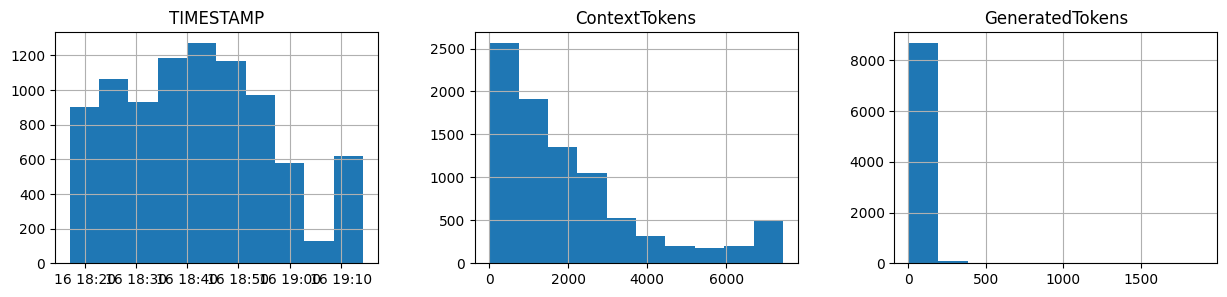

Conversation


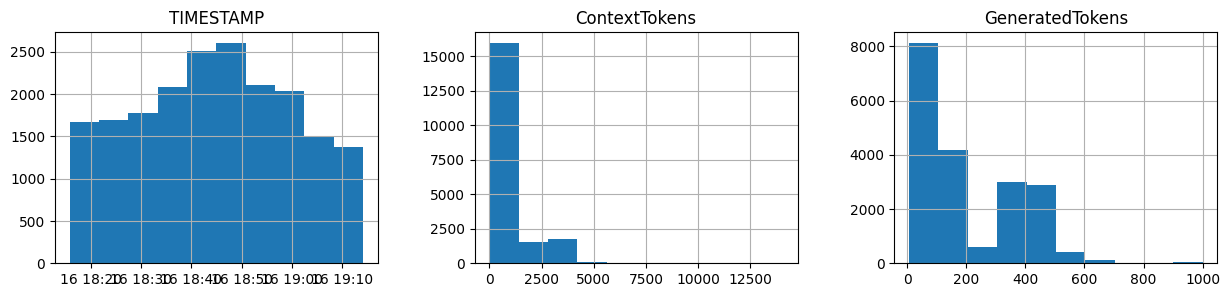

In [7]:
for trace_name, df_trace in df_traces.items():
    print(trace_name)
    df_trace.hist(
        layout=(1, 3),
        figsize=(15, 3),
    )
    plt.show()

## Token distributions

In [8]:
def get_cdf(df, field):
    vals = sorted(df[field].values)
    invs = 100.0 * np.arange(0, len(df)) / len(df)
    return vals, invs

In [9]:
def plt_tokens(dfs, field="ContextTokens", title="Input Tokens"):
    for df_key, df in dfs.items():
        df_tokens, df_inv = get_cdf(df, field)
        plt.plot(df_tokens, df_inv, label=df_key)
    plt.title(title)
    plt.ylabel("CDF")
    plt.xlabel("Number of tokens")
    plt.legend()
    plt.grid()
    plt.show()

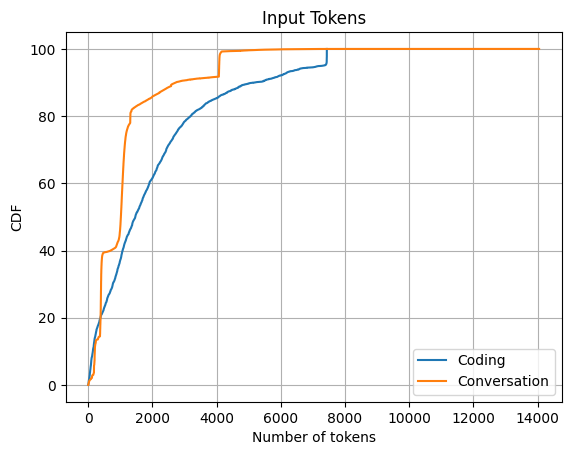

In [10]:
plt_tokens(df_traces, "ContextTokens", "Input Tokens")

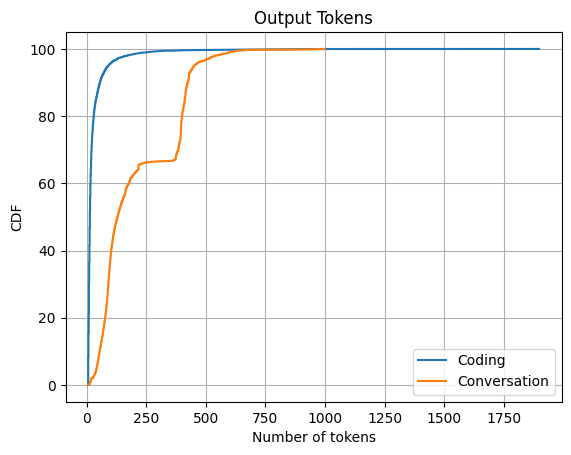

In [11]:
plt_tokens(df_traces, "GeneratedTokens", "Output Tokens")

## Correlation

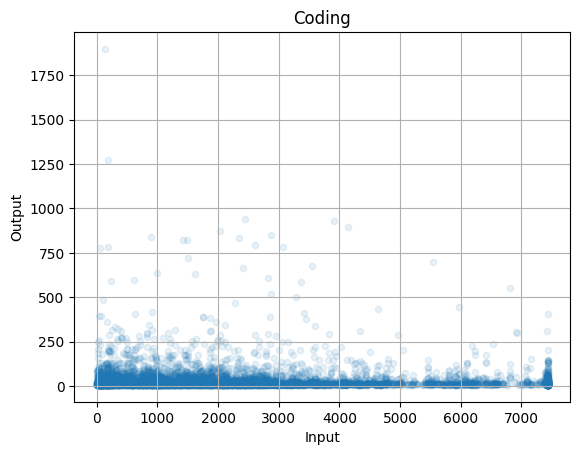

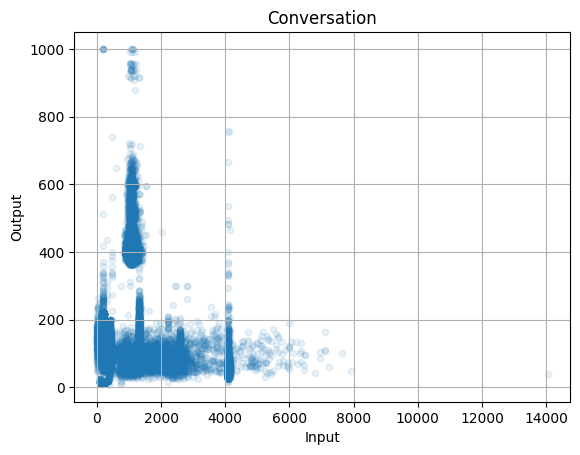

In [12]:
for trace_name, df_trace in df_traces.items():
    df_trace[["ContextTokens", "GeneratedTokens"]].plot.scatter(
        x="ContextTokens",
        y="GeneratedTokens",
        xlabel="Input",
        ylabel="Output",
        alpha=0.1,
        grid=True,
        title=trace_name,
    )
    plt.show()

## Analysis over time

In [30]:
def plt_invocations_time(df, timescale="S"):
    assert timescale in ["S", "min"]
    df_copy = df.copy()
    df_copy["Time"] = df_copy["TIMESTAMP"].dt.round(freq=timescale)
    counts = df_copy.groupby("Time").count()["TIMESTAMP"]
    y_list = counts.tolist()
    print(len(y_list))
    print(y_list)  # Print the y-axis values to stdout
    counts.plot(grid=True, ylim=0)
    plt.ylabel(f"Number of invocations per {timescale}")
    plt.show()

In [14]:
def plt_tokens_time(df, field="ContextTokens", label="Input", show=False):
    df_copy = df.copy()
    df_copy["Time"] = df_copy["TIMESTAMP"].dt.round(freq="min")
    df_copy.groupby("Time").sum()[field].plot(
        grid=True,
        ylim=0,
        label=label,
    )
    plt.ylabel("Number of tokens per minute")
    plt.legend()
    if show:
        plt.show()

951
[5, 7, 1, 8, 4, 2, 4, 10, 5, 3, 5, 3, 6, 6, 3, 4, 15, 1, 3, 14, 3, 6, 16, 27, 18, 33, 17, 7, 9, 3, 4, 10, 2, 9, 18, 7, 4, 2, 20, 9, 16, 17, 11, 27, 7, 14, 23, 11, 11, 26, 33, 21, 28, 16, 5, 12, 10, 10, 6, 5, 5, 8, 5, 6, 5, 12, 10, 7, 6, 6, 5, 7, 2, 7, 5, 6, 5, 7, 9, 5, 5, 2, 10, 9, 4, 5, 9, 5, 4, 8, 7, 5, 8, 6, 3, 2, 1, 8, 5, 3, 6, 5, 5, 4, 6, 4, 2, 4, 4, 7, 2, 10, 7, 4, 7, 3, 6, 3, 5, 6, 6, 5, 7, 7, 2, 20, 2, 10, 3, 7, 17, 9, 2, 4, 16, 33, 25, 28, 39, 37, 44, 22, 6, 7, 7, 6, 25, 26, 13, 22, 40, 6, 3, 4, 11, 13, 13, 11, 11, 13, 16, 10, 10, 12, 21, 16, 12, 13, 9, 14, 14, 12, 11, 11, 18, 19, 11, 7, 5, 7, 3, 6, 6, 8, 5, 10, 12, 8, 6, 9, 3, 2, 6, 5, 5, 3, 6, 6, 5, 5, 3, 6, 9, 10, 6, 4, 4, 19, 5, 5, 4, 9, 8, 16, 41, 37, 18, 43, 42, 68, 52, 60, 35, 14, 5, 8, 7, 6, 5, 7, 2, 9, 7, 10, 3, 2, 6, 9, 2, 7, 5, 3, 2, 6, 23, 11, 12, 8, 5, 7, 11, 12, 5, 9, 9, 7, 8, 10, 15, 16, 18, 17, 8, 20, 11, 16, 11, 9, 9, 5, 12, 13, 4, 6, 7, 6, 6, 2, 2, 6, 2, 2, 3, 9, 5, 2, 20, 22, 17, 7, 4, 6, 9, 7, 10, 7, 2,

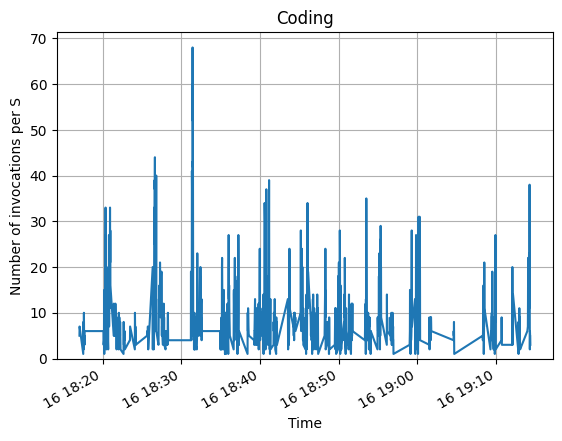

46
[12, 51, 201, 378, 220, 64, 42, 108, 712, 178, 475, 390, 66, 231, 217, 399, 42, 128, 292, 518, 137, 239, 253, 222, 283, 70, 99, 299, 195, 100, 94, 248, 337, 38, 153, 130, 348, 99, 32, 97, 75, 137, 22, 62, 83, 243]


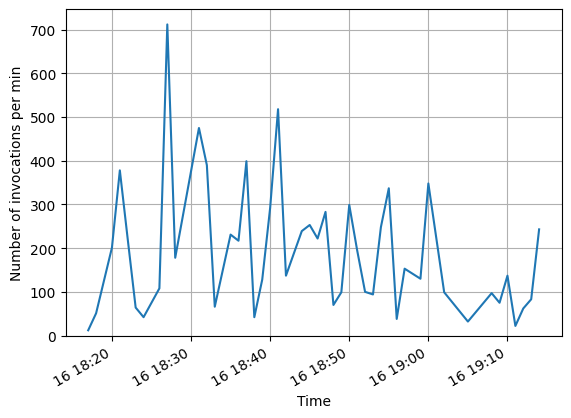

3463
[1, 3, 2, 1, 4, 2, 2, 2, 1, 3, 3, 2, 2, 1, 4, 3, 1, 2, 2, 5, 4, 2, 5, 2, 1, 3, 2, 6, 3, 1, 2, 3, 4, 5, 3, 2, 9, 5, 4, 9, 7, 3, 6, 8, 8, 8, 5, 5, 3, 3, 1, 10, 2, 6, 7, 7, 4, 2, 12, 7, 2, 4, 1, 3, 3, 5, 5, 3, 3, 6, 2, 5, 8, 4, 3, 4, 3, 5, 6, 3, 8, 5, 5, 2, 5, 5, 1, 6, 3, 4, 6, 3, 4, 4, 5, 7, 4, 2, 3, 7, 3, 3, 2, 4, 5, 4, 4, 8, 3, 4, 3, 4, 6, 5, 3, 2, 8, 6, 6, 5, 2, 6, 10, 5, 5, 3, 3, 3, 11, 3, 2, 5, 3, 5, 9, 2, 10, 3, 5, 6, 7, 5, 9, 5, 10, 2, 3, 4, 4, 5, 11, 5, 7, 7, 11, 3, 5, 5, 8, 5, 8, 4, 2, 7, 6, 3, 4, 4, 5, 7, 7, 6, 9, 5, 10, 7, 4, 9, 6, 7, 8, 12, 3, 2, 6, 3, 6, 3, 9, 4, 3, 5, 5, 6, 3, 7, 8, 4, 8, 3, 5, 4, 5, 11, 10, 5, 9, 8, 1, 6, 2, 7, 5, 4, 4, 7, 2, 3, 7, 9, 4, 8, 9, 8, 8, 13, 8, 2, 4, 2, 8, 4, 5, 3, 3, 6, 3, 4, 4, 3, 4, 6, 8, 7, 1, 5, 10, 6, 6, 7, 8, 4, 4, 5, 3, 9, 5, 4, 7, 6, 3, 1, 7, 4, 4, 3, 3, 6, 9, 3, 7, 3, 7, 7, 6, 9, 6, 4, 4, 7, 8, 2, 2, 7, 3, 4, 7, 5, 4, 6, 5, 6, 3, 6, 5, 6, 5, 6, 7, 6, 3, 10, 4, 1, 10, 4, 4, 6, 3, 1, 6, 2, 5, 7, 10, 3, 4, 4, 6, 3, 7, 4, 4, 1, 2, 3,

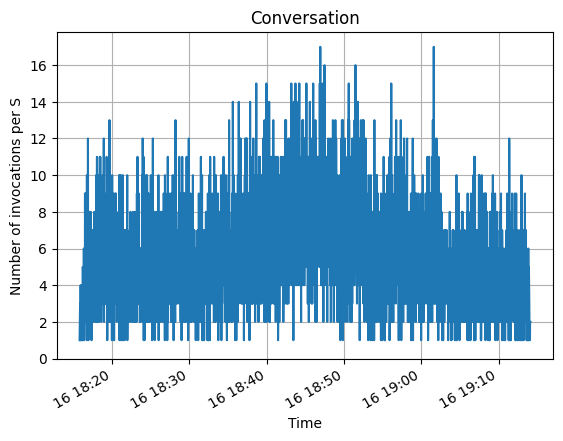

59
[105, 282, 303, 343, 329, 282, 274, 271, 283, 315, 289, 304, 336, 322, 311, 284, 259, 325, 318, 339, 361, 351, 383, 407, 376, 414, 412, 448, 490, 458, 444, 522, 453, 401, 414, 425, 476, 344, 317, 309, 325, 367, 338, 331, 330, 360, 376, 264, 210, 252, 260, 272, 271, 254, 257, 243, 252, 240, 85]


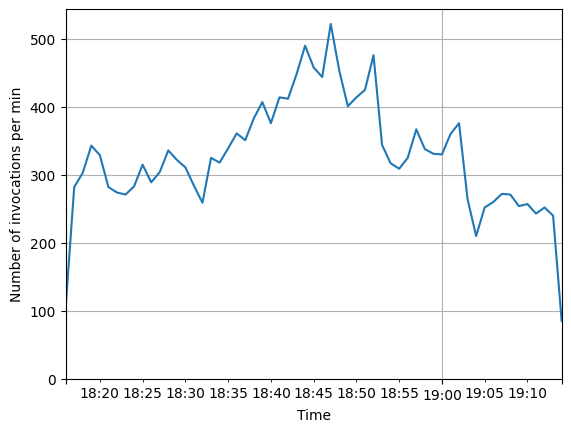

In [31]:
for trace_name, df_trace in df_traces.items():
    plt.title(trace_name)
    plt_invocations_time(df_trace, timescale="S")
    plt_invocations_time(df_trace, timescale="min")
    # plt_invocations_time(df_trace, timescale="S")

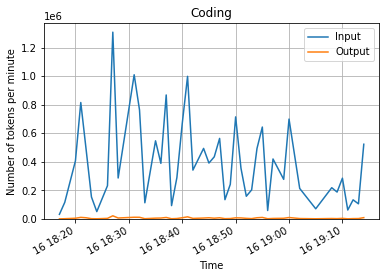

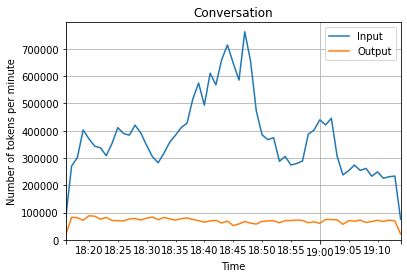

In [16]:
for trace_name, df_trace in df_traces.items():
    plt.title(trace_name)
    plt_tokens_time(df_trace, "ContextTokens", "Input")
    plt_tokens_time(df_trace, "GeneratedTokens", "Output")
    plt.show()